In [51]:
# Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
from scipy.stats import chi2
import os,sys
import seaborn as sns
sns.set_style('whitegrid')

# import helper script file
## change working directory
os.chdir("C:/Users/rokka/GH-repos/GitHubPages/Code-Reference-Notebook/CU-Boulder/AstroPhys/HW")

## import my own code
import hw_helper_func2 as hf   # this is my own code I made (for probability/distribution fucntions, etc.)

(**JK note:** To view the code with the functions I made myself to (hopefully) help with all assignments [click here](https://rokkaan5.github.io/Code-Reference-Notebook/CU-Boulder/AstroPhys/HW/hw_helper_func2.html))

# 1. Combining Poisson Distributions
Given two Poisson distributions:
$$P(x,\mu_A) = \frac{\mu_A^x}{x!}e^{-\mu_A} \text{ and } P(x,\mu_B) = \frac{\mu_B^x}{x!}e^{-\mu_B}$$
Show that they combine to a Poisson distribution:
$$P(x,\mu_C) \text{ where } \mu_C = \mu_A + \mu_B$$

**Hint:** For any given integer $x$, the one must sum all possibilities of $P(i,\mu_A)P(x-i,\mu_B)$.

```
Didn't finish yet
```

# 2. Supernova Light Curve
After a supernova reaches its maximum brightness, the light curve exponentially decays as do the radioactive materials. The decay time can tell us its type. Examine the light curve below.

$$I = [0.921, 0.704, 0.623, 0.550, 0.426, 0.332, 0.258, 0.208, 0.143, 0.130, 0.137, 0.103, 0.058, 0.070, 0.042, 0.060, 0.022, 0.022, 0.011, 0.015]$$
$$ \sigma =  [0.026, 0.048, 0.026, 0.027, 0.068, 0.046, 0.034, 0.017, 0.020, 0.014, 0.015, 0.009, 0.019, 0.010, 0.012, 0.018, 0.007, 0.008, 0.005, 0.005]$$

![](light_curve.PNG){width=700}

In [52]:
I = np.array([0.921, 0.704, 0.623, 0.550, 0.426, 0.332, 0.258, 0.208, 0.143, 0.130, 
              0.137, 0.103, 0.058, 0.070, 0.042, 0.060, 0.022, 0.022, 0.011, 0.015])
sigma =  np.array([0.026, 0.048, 0.026, 0.027, 0.068, 0.046, 0.034, 0.017, 0.020, 0.014, 
                   0.015, 0.009, 0.019, 0.010, 0.012, 0.018, 0.007, 0.008, 0.005, 0.005])

## Part (a)
Assuming that $\sigma$ represents a 1-sigma Gaussian uncertainty, find the most likely parameters under the hypothesis that the intensity undergoes an exponential decay:
$$I = I_0 e^{-t/\tau}$$

Here, $\tau$ is the decay time. As one can see, $I_0$ should be nearly unity but, for this problem, do not fix $I_0 = 1$. Calculate the uncertainty in $\tau$. Plot the observations and the fit. 

**Hint:** One way is to perform a linear fit to $ln(I)$. Be careful how you treat the uncertainty $\sigma$; Taylor expand $ln(I\pm \sigma)$ to calculate the uncertainties of $ln(I)$.

![](Q2a_1-2.PNG){width=500}

```
Calculating uncertainty in tau not finished yet
```

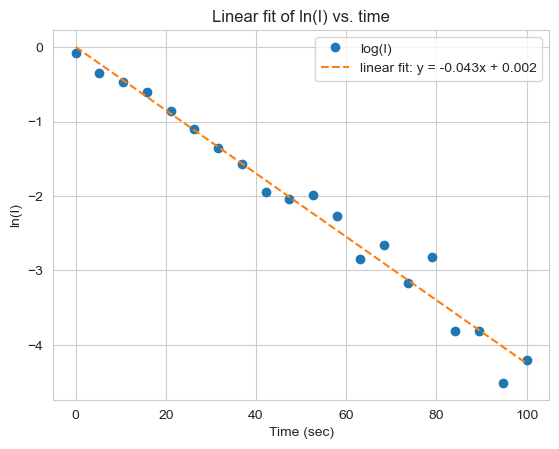

In [53]:
# Linear fit of ln(I)
## x-axis (time)
t = np.linspace(0,100,len(I))           # the x-axis (time) appears to go from 0 to 100 sec in the example figure, so I matched that structure
## linear fit
coef = np.polyfit(t,np.log(I),deg=1)    # obtain coefficients for a linear fit ("polyfit" of order=1) of ln(I)
lin_fit = np.poly1d(coef)               # linear fit function

# plot linear fit
plt.plot(t,np.log(I),'o',label = 'log(I)')
plt.plot(t,lin_fit(t),'--',label='linear fit: y = {0:.3f}x + {1:.3f}'.format(coef[0],coef[1]))
plt.title("Linear fit of ln(I) vs. time")
plt.xlabel('Time (sec)')
plt.ylabel('ln(I)')
plt.legend()

In [54]:
print("slope of linear fit:",coef[0])
print("intercept of linear fit:",coef[1])

slope of linear fit: -0.04250665756665193
intercept of linear fit: 0.0021199482368504264


In [55]:
print("tau:", -1/coef[0])
print("I0:",np.exp(coef[1]))

tau: 23.52572649194929
I0: 1.002122196915861


## Part (b)
Calculate $\chi_\nu^2$ and compare it to the expected PDF/CDF of $\chi_\nu^2$. Plot your results. Is the hypothesis justified? What is the probability for $\chi_\nu^2$ to be above the calculated value?

### Jasmine's note-to-self
#### $\chi_N^2$ ("traditional"; unbinned, non-reduced)

\begin{align*}
\chi_N^2 &= \displaystyle \sum_{i=1}^N \frac{(x_i - \mu')^2}{\sigma^2} \\
& \approx \displaystyle \sum_{i=1}^N \frac{(x_i - \mu')^2}{\mu'} \\
& \approx \displaystyle \sum_{i=1}^N \frac{(x_i - \mu')^2}{\sigma_i ^2}
\end{align*}

Where:

- $\sigma^2 \equiv$ parent variance
- $\mu' \equiv$ expected variance
- $\sigma_i^2 \equiv$ variance of an individual measurement

#### Generalizing, we can write:

\begin{align*}
\chi_\nu^2 &= \displaystyle \sum_{i=1}^N \frac{(y_i - y(x_i))^2}{\sigma_i^2} &&\to \nu = N-m \\
\chi_R^2 &= \frac{1}{\nu} \chi_\nu^2 &&\to 1 \\
\end{align*}

In [56]:
# hypothesized formula for intensity 
def hyp_function_I(t):
    """hypothesis function for intensity (I) undergoing exponential decay
    I = I_0*exp(-t/tau)
    """
    tau = -1/coef[0]            # use tau calculated from linear fit in part (a)
    I0 = np.exp(coef[1])        # use I_0 calculated from linear fit in part (a)
    return I0*np.exp(-t/tau)    # I_0*e^(-t/tau)

If I use

\begin{align*}
\chi_\nu^2 &= \displaystyle \sum_{i=1}^N \frac{(y_i - y(x_i))^2}{\sigma_i^2}
\end{align*}

Where:

* $y_i =$ $i^{th}$ element in $I$ (measured intensity)
* $y(x_i) =$ calculated $I_i$ using the hypothesized formula ($I_i=I_0e^{-t_i/\tau}$)
* $\sigma_i = i^{th}$ element in the given list of $\sigma$ (variance in measurement)

In [57]:
# calculate I from hypothesis function
calculated_I = hyp_function_I(t=t)

In [58]:
q2b = hf.chi_squared(x=I,parameters=1,sigma=sigma)
q2b.calculate_chi2(x=I,mu_prime=calculated_I,sigma_2=sigma**2,set_to_object=True)
print('chi-squared ("traditional"; non-reduced) = ',q2b.cs)

chi-squared ("traditional"; non-reduced) =  32.90276036256053


In [59]:
df = 20
confidence = q2b.calculate_chi2_confidence(cs=q2b.cs,df=df,set_to_object=True )
print("For chi-squared={0:.3f} with {1:.0f} deg. of freedom:".format(q2b.cs,df))
print("Probability:", chi2.pdf(x=q2b.cs,df=df))
print("Confidence:", confidence)

For chi-squared=32.903 with 20 deg. of freedom:
Probability: 0.00871534107424103
Confidence: 0.03457894779339932


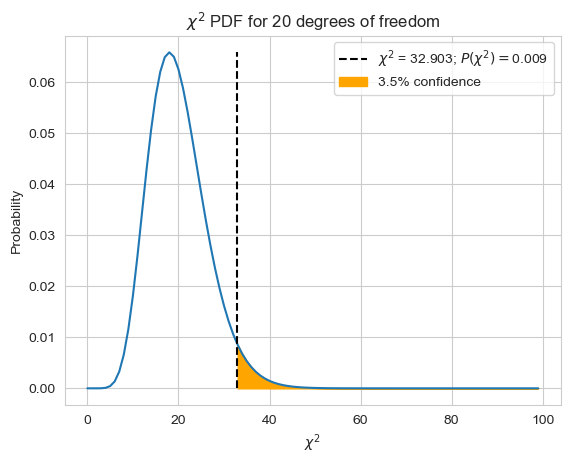

In [60]:
q2b.plot_chi2_pdf(df=20)

# 3. Extra-Solar Planet
The Kepler mission used the transit method in which one examines a time series of a star's intensity for a negative excursion. Under this method, the parent distribution of a star's intensity can be well established. In this example, the star's intensity is measured at a 30 sec cadence and found to be $I_0 + 0.001 I_0$ (1-sigma) with a Gaussian parent distribution.

Finding a transit often involves several steps. The first step is to identify intervals that may have a transiting planet. One way is to examine one hour (120-point) stretches (sliding every half an hour, 60 points) for a non-constant distribution.

Read in the text file, `HW4_data_A`, from Canvas. It contains 120 points of intensity in units of $I_0$, one every 30 seconds. Create a corresponding time array going from 0 to 3570 seconds. Assume the uncertainty in time is negligible.

![](exoplanet.PNG)

In [61]:
# load data
data_array = np.loadtxt('hw4/HW4_data.txt')
data_array

array([0.998088, 1.00058 , 1.00007 , 1.00085 , 0.999086, 1.00013 ,
       1.00114 , 0.999925, 1.00042 , 1.00063 , 1.00064 , 0.999636,
       1.00013 , 0.999742, 1.00007 , 1.00132 , 0.999664, 0.999608,
       0.999392, 0.999136, 1.00104 , 1.00014 , 0.99976 , 1.0011  ,
       0.999397, 0.99961 , 0.998294, 0.998431, 0.998846, 0.99919 ,
       0.998581, 1.00151 , 0.999167, 1.00092 , 1.00044 , 0.999879,
       1.00071 , 0.998279, 1.00031 , 0.999818, 0.998973, 1.00086 ,
       0.994858, 0.997352, 0.99644 , 0.994283, 0.994575, 0.995698,
       0.994824, 0.994713, 0.995482, 0.994736, 0.996792, 0.995706,
       0.994752, 0.993211, 0.994558, 0.993956, 0.995004, 0.993613,
       0.993948, 0.995872, 0.996478, 0.994574, 0.995362, 0.99529 ,
       0.996243, 0.993112, 1.00004 , 0.99792 , 0.999602, 1.00021 ,
       1.00079 , 0.999311, 1.00047 , 0.999404, 0.999304, 1.00148 ,
       1.00072 , 1.00014 , 1.00301 , 1.00228 , 0.998727, 1.00173 ,
       0.998629, 1.00067 , 1.00009 , 0.999671, 1.00097 , 1.000

In [62]:
# create time-array
t0 = 0          # start of time array
tf = 3570       # end of time array
dt = 30         # timestep (30 seconds)

time_array = np.arange(t0,tf+dt,dt)
print("length of time_array:",len(time_array))

length of time_array: 120


Text(0.5, 1.0, 'Plot to make sure loaded data and created time-array match example figure')

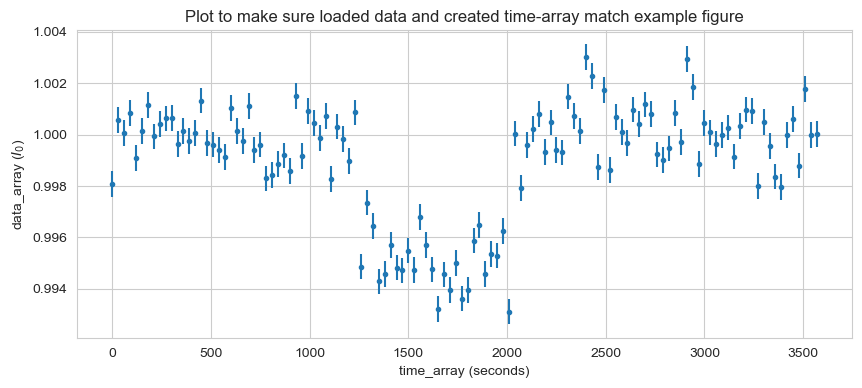

In [63]:
# plot (with error bars)
plt.figure(figsize=(10,4))
plt.errorbar(time_array,data_array,yerr=0.0005*data_array,fmt='.')
plt.xlabel('time_array (seconds)')
plt.ylabel('data_array ($I_0$)')
plt.title("Plot to make sure loaded data and created time-array match example figure")

## Part (a)
Start by eliminating the possibility that the negative excursion is a random fluctuation. Plot the PDF of the expected $\chi_\nu^2$ under the hypothesis that the intensity is constant. Calculate $\chi_\nu^2$ and compare to show that this event is **not** consistent with a constant intensity. What is the mean of the intensity ($I_\mu$) and the uncertainty of the mean ($\sigma_{I\mu}$)? Is $I_\mu$ less than 1 by more than the $\sigma_{I\mu}$?

**Hint:** $\sigma$ of the parent distribution is known ($0.001 I_0$)

In [64]:
print("mean of intensity:",np.mean(data_array))

mean of intensity: 0.9989476166666668


In [65]:
# uncertainty of mean
# (come back to this later)

In [66]:
cs_constant = hf.chi_squared(x=data_array,sigma=0.001*data_array)
cs_constant.calculate_chi2(x=data_array,mu_prime=np.mean(data_array),sigma_2=(0.001*data_array)**2,set_to_object=True)

637.8838224539259

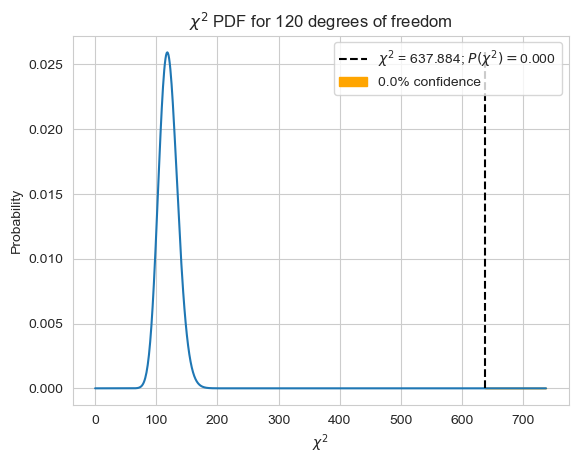

In [67]:
cs_constant.plot_chi2_pdf(cs=cs_constant.cs,df=len(data_array))

## Part (b)
Now that the interval is identified as significant and negative, let's examine and fit the negative excursion. Keeping it simple, use a three-parameter ($I_0, t_{start},t_{end}$) fit:

\begin{equation*}
I = 
\begin{cases}
I_0 - \Delta I & t_{start} \le t \le t_{end}\\
I_0 & \text{otherwise}
\end{cases}
\end{equation*}

Do a least-squares fit with a method of choose. My method is to guess $t_{start}$ and $t_{end}$ then calculate $\chi_\nu^2$ along with $\Delta I$. Increment $t_{start}$ and $t_{end}$ and recalculate $\Delta I$ until  $\chi_\nu^2$ is minimum. Plot the data (with error bars if you can) and overplot your fit. What are $I_0, t_{start},$ and $t_{end}$?

In [68]:
# TODO: Have a way to "automate" finding lowest chi-squared for given time-intervals to try
class exo_partb:
    def __init__(self,t_start,t_end,I0=1,data=data_array,time=time_array,sigma=None):
        self.data_array = data
        self.time_array = time
        self.t_start = t_start
        self.t_end = t_end
        self.I0 = I0
        
        if sigma is None:
            self.sigma = 0.001*self.data_array
        else:
            self.sigma = sigma

    def fit_udu(self,t_start=None, t_end=None, I0=None,
                set_to_object=True,
                calculate_chi_squared = True,
                sigma=None):
        """Fit 'up-down-up'
        """
        if t_start is None:
            t_start = self.t_start
        if t_end is None:
            t_end = self.t_end
        if I0 is None:
            I0 = self.I0

        delta_I = I0 - np.mean(self.data_array[(self.time_array>=t_start) & (self.time_array<=t_end)])
        fit = []
        for t in time_array:
            if t >= t_start and t <= t_end:
                fit.append(I0 - delta_I)
            else:
                fit.append(I0)

        fit = np.array(fit)
        if set_to_object:
            self.fit = fit

        if calculate_chi_squared:
            if sigma is None:
                sigma = self.sigma
            self.chi2 = hf.nonreduced_chi2(x=self.data_array,mu_prime=fit,sigma_2=sigma**2)
            self.reduced_chi2 = hf.reduced_chi2(x=self.data_array,mu_prime=fit,sigma_2=sigma**2,
                                                parameters=3,verbose=False)
            print("For fit with parameters, t_start={0:.0f}, t_end={1:.0f}, & I0={2:.3f}:".format(t_start,t_end,I0))
            print("(non-reduced) chi-squared:",self.chi2)
            print("reduced chi-squared:",self.reduced_chi2)
            return fit
        
        return fit

    def plot_data_eb(self,title="Plot Data with Error bars"):
        """Plot data with error bars"""
        plt.errorbar(self.time_array,self.data_array,yerr=self.sigma/2,fmt='.',label='data (with error bars)')
        plt.xlabel('time_array (seconds)')
        plt.ylabel('data_array ($I_0$)')
        plt.title(title)

    def overplot_fit_to_data(self,fit=None,title="Overplot fit with data & error bars"):
        if fit is None:
            fit = self.fit_udu(t_start=self.t_start,t_end=self.t_end,I0=self.I0)

        self.plot_data_eb(title=title)
        plt.plot(self.time_array,fit,label='Fit function; $\chi^2 =${0:.2f}'.format(self.chi2))
        

In [69]:
t_start = 1250
t_end = 2010

q3b = exo_partb(t_start=t_start,t_end=t_end,I0=np.mean(data_array[time_array<t_start]))

For fit with parameters, t_start=1250, t_end=2010, & I0=1.000:
(non-reduced) chi-squared: 132.59462317601458
reduced chi-squared: 1.133287377572774


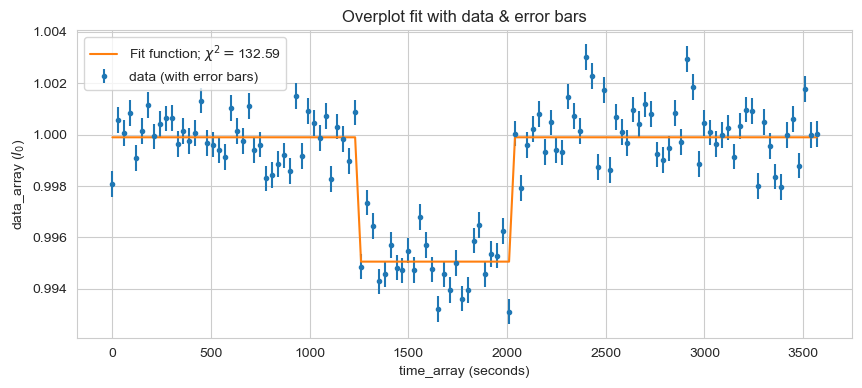

In [70]:
# plot (with error bars)
plt.figure(figsize=(10,4))
q3b.overplot_fit_to_data()
plt.legend()

Not asked in the problem, but Jasmine was just curious


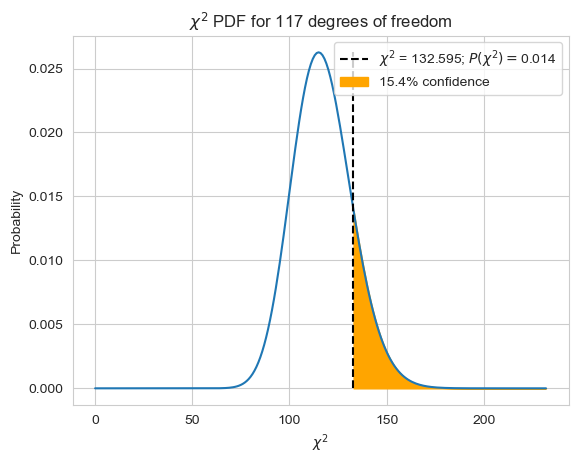

In [71]:
print("Not asked in the problem, but Jasmine was just curious")
c3b = hf.chi_squared(x=data_array,parameters=3,sigma=0.001*data_array)
c3b.plot_chi2_pdf(cs=q3b.chi2)

## Part (c)
Estimate the uncertainties of $I_0, t_{start},$ and $t_{end}$. Explain how you arrive at your values. 

**Hint:** The uncertainty of $\Delta I$ is straight-forward. Recall that you can calculate $\sigma_I$, but $\partial t/ \partial I$ can only be estimated. Can one have an uncertainty in time that is less than $\delta t$ (30 seconds)?

In [72]:
# not finished yet

# 4. Kolmogorov-Smirnov Test
Using a random number generator, create two distributions:
$$f_1(x) = P(x,\mu_1,n); \mu_1 = 8, n = 100$$
$$f_2(x) = P(x,\mu_2,n); \mu_2 = 5, n = 100$$

In [73]:
n_points = 100

# distribution 1
mu1 = 8
fx1 = np.random.normal(mu1, size=n_points)

# distribution 2
mu2 = 5
fx2 = np.random.normal(mu2,size=n_points)


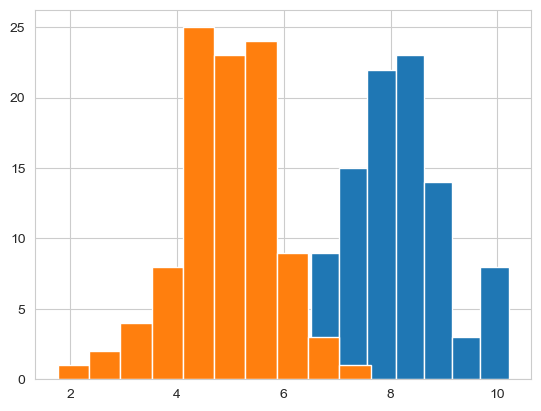

In [74]:
# histogram of two distributions
plt.hist(fx1)
plt.hist(fx2)
plt.show()

## Part (a)
Calculated and plot the two CDFs for $n=100$. Compare the two distributions using the Kolmogorov-Smirnov Test with $\alpha=0.1$. The more exact formula for the threshold is: 
$$D > \sqrt{-\frac{1}{2} \ln \left( \frac{\alpha}{2}\right)} \sqrt{\frac{n+m}{nm}}; n,m \text{ are number of points}$$

In [75]:
# not finished yet

## Part (b)
Repeat the test several (5 to 10) times recreating the distributions. Do $f_1$ and $f_2$ consistently pass or fail the test?

In [76]:
# not finished yet

## Part (c)
Repeat the test for higher $n$, say 1000 (for both $f_1$ and $f_2$) several times. Does the test at $n=1000$ reveal that the two distributions are not from the same parent? What does this exercise tell us about the Kolmogorov-Smirnov Test?

In [77]:
# not finished yet